# Tissue dielectric calculations
*Author: Dr Vitas Anderson*

Calculate tissue dielectric values using the Gabriel formulas published in:</br>
Gabriel, S. Lau, R.W. & Gabriel, C. (1996) **"The dielectric properties of biological tissues: III.
Parametric models for the dielectric spectrum of tissues"**, *Phys. Med. Biol.* 41 (1996) 2271–2293


## Setup

In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn

## Functions

In [19]:
def cce(w, e, tau, alpha):
    """Calculate the Cole-Cole equation for w and the dispersion parameters"""
    return e / (1 + (1j * w * tau)**(1-alpha))

def tissue_dielectric(p, fMHz, factor=1):
    """Calculate the Gabriel tissue dielectric values, er and sigma
       at fMHz frequency
       INPUTS:
         fMHz = frequency in MHz
         p = pandas array containing Gabriel tissue parameters
         factor = factor to multiply er and sigma (e.g. 2/3 for Hurt muscle)
       OUTPUTS:
         er = tissue relative permittivty
         sigma = tissue conductivity in units of S/m
       """
    
    # Permittivity of free space
    e0 = 8.85418782E-12  
    
    # Calculate the angular frequency, w'
    w = 2 * np.pi * (fMHz * 1e6)
    
    # Calculate the complex permitivity'
    ec = p.einf + cce(w,p.e1,p.tau1,p.alpha1) + \
                  cce(w,p.e2,p.tau2,p.alpha2) + \
                  cce(w,p.e3,p.tau3,p.alpha3) + \
                  cce(w,p.e4,p.tau4,p.alpha4) + \
                  p.sigma/(1j*w*e0)
    
    # Multiply ec by factor
    ec = ec * factor
    
    # Calculate permittivity and conductivity
    er = np.real(ec)
    sigma = -w * np.imag(ec) * e0
    
    return er, sigma

## Load tissue data

### Gabriel tssue dielectric parameters

In [16]:
gtdp = pd.read_excel("Gabriel tissue dielectric parameters.xlsx",index_col=0).T
gtdp

TISSUE,einf,sigma,e1,tau1,alpha1,e2,tau2,alpha2,e3,tau3,alpha3,e4,tau4,alpha4
aorta,4.0,0.2500,40.0,8.842000e-12,0.10,50.0,3.183000e-09,0.10,100000.0,0.000159,0.20,10000000.0,0.001592,0.00
bladder,2.5,0.2000,16.0,8.842000e-12,0.10,400.0,1.592000e-07,0.10,100000.0,0.000159,0.20,10000000.0,0.015920,0.00
blood,4.0,0.7000,56.0,8.377000e-12,0.10,5200.0,1.326000e-07,0.10,0.0,0.000159,0.20,0.0,0.015920,0.00
bone cancellous,2.5,0.0700,18.0,1.326000e-11,0.22,300.0,7.958000e-08,0.25,20000.0,0.000159,0.20,20000000.0,0.015920,0.00
bone cortical,2.5,0.0200,10.0,1.326000e-11,0.20,180.0,7.958000e-08,0.20,5000.0,0.000159,0.20,100000.0,0.015920,0.00
bone marrow (infiltrated),2.5,0.1000,9.0,1.447000e-11,0.20,80.0,1.592000e-08,0.10,10000.0,0.001592,0.10,2000000.0,0.015920,0.10
bone marrow (not infiltrated),2.5,0.0005,3.0,7.958000e-12,0.20,25.0,1.592000e-08,0.10,5000.0,0.001592,0.10,2000000.0,0.015920,0.10
breast fat,2.5,0.0100,3.0,1.768000e-11,0.10,15.0,6.366000e-08,0.10,50000.0,0.000455,0.10,20000000.0,0.013260,0.00
cartilage,4.0,0.1500,38.0,1.326000e-11,0.15,2500.0,1.447000e-07,0.15,100000.0,0.000318,0.10,40000000.0,0.015920,0.00
cerebellum,4.0,0.0400,40.0,7.958000e-12,0.10,700.0,1.592000e-08,0.15,200000.0,0.000106,0.22,45000000.0,0.005305,0.00


### Taro model tissue masses

In [17]:
taro = pd.read_excel("Taro tissue masses.xlsx",index_col=0)
taro

,mass
tissue,
muscle,26556.0
body_fat,14445.0
skeleton,11186.0
skin,3722.0
brain,1399.0
liver,1185.0
stomach,193.0
heart,419.0
spleen,146.0


In [18]:
taro[taro.index.isin(gtdp.index)]

,mass
tissue,
muscle,26556.0
liver,1185.0
stomach,193.0
heart,419.0
spleen,146.0
kidney,311.0
thyroid,15.2


## Test the tissue dielectric function

In [20]:
td = gtdp.agg(tissue_dielectric, axis=1, fMHz=5000).round(3)
td.columns = ['er','sigma']
td

,er,sigma
aorta,39.295,3.533
bladder,16.674,1.531
blood,53.950,5.395
bone cancellous,16.051,1.811
bone cortical,10.040,0.962
bone marrow (infiltrated),9.053,0.976
bone marrow (not infiltrated),5.038,0.234
breast fat,4.645,0.350
cartilage,33.627,4.085
cerebellum,41.053,4.194


### Two-thirds muscle values

In [21]:
muscle = gtdp.loc['muscle'].to_frame().T
freqs = [300,450,750,8335,900,1450,1800,2000,2450,2600,3000,
         4000,5000,5200,5400,5600,5800,6000]
tt = pd.DataFrame(columns=['er','sigma','fMHz'])
for fMHz in freqs:
    td = muscle.agg(tissue_dielectric, axis=1, fMHz=fMHz, factor=2/3).round(2)
    td.columns = ['er','sigma']
    td['fMHz'] = fMHz
    tt = tt.append(td)
tt

,er,sigma,fMHz
muscle,38.80,0.51,300
muscle,37.84,0.54,450
muscle,36.95,0.60,750
muscle,30.02,5.51,8335
muscle,36.69,0.63,900
muscle,36.02,0.78,1450
muscle,35.70,0.89,1800
muscle,35.53,0.97,2000
muscle,35.15,1.16,2450
muscle,35.03,1.23,2600


## Create plots of tissue dielectric parameters

### Create dataframe of $\epsilon_r$ and $\sigma$ for all tissues and selected frequencies

In [22]:
freqs = [100,200,400,1000,2000,5000]

df = pd.DataFrame(columns=['er','sigma','fMHz'])
for fMHz in freqs:
    td = gtdp.agg(tissue_dielectric, axis=1, fMHz=fMHz)
    td.columns = ['er','sigma']
    td['fMHz'] = fMHz
    df = pd.concat([df,td])    

df = df.rename_axis('tissue').reset_index()
df

,tissue,er,sigma,fMHz
0,aorta,59.779773,0.461758,100
1,bladder,22.651827,0.293920,100
2,blood,76.821905,1.233149,100
3,bone cancellous,27.628629,0.172498,100
4,bone cortical,15.282459,0.064312,100
...,...,...,...,...
259,tongue,48.995566,4.267938,5000
260,trachea,36.864088,3.340423,5000
261,uterus,53.681111,4.978992,5000
262,vitreous humour,65.809936,5.411099,5000


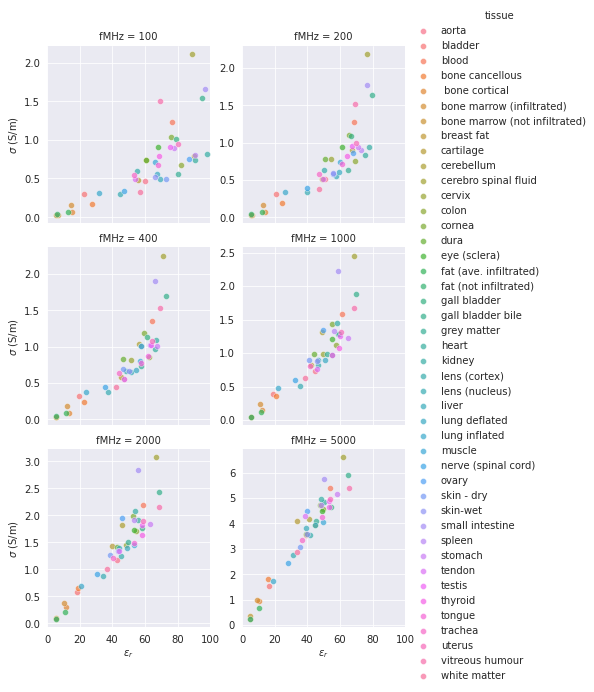

In [23]:
with sn.axes_style("darkgrid"):
    g = sn.FacetGrid(df, col="fMHz", col_wrap=2,hue="tissue",
                     xlim=(0,100),sharey=False)
    g.map(sn.scatterplot, "er", "sigma", alpha=.7)
    g.add_legend()
    g.set_axis_labels(r'$\epsilon_r$',r'$\sigma$ (S/m)')
    g.tight_layout()
    g.savefig('sigma v er.png',dpi=200)

## Scratch

### Create log scale of investigation frequencies

In [47]:
freqs = np.logspace(2,np.log10(6000),num=21).round(1)
print(*freqs, sep=', ')

100.0, 122.7, 150.6, 184.8, 226.8, 278.3, 341.5, 419.1, 514.4, 631.2, 774.6, 950.6, 1166.5, 1431.5, 1756.7, 2155.8, 2645.6, 3246.6, 3984.2, 4889.3, 6000.0


### test out the cce function

In [49]:
fMHz = 100
tissue = 'aorta'

print(tissue)
w = 2 * np.pi * fMHz * 1e6
for i in [1,2,3,4]:
    e, tau, alpha = gtdp.loc[tissue,"e"+str(i):"alpha"+str(i)]
    print(f'{i}: {w=}, {e=}, {tau=}, {alpha=}')
    disp = cce(w,e,tau,alpha) 
    print(f'{disp=}\n')

aorta
1: w=628318530.7179587, e=40.0, tau=8.842e-12, alpha=0.1
disp=(39.93826589119501-0.3678176108102568j)

2: w=628318530.7179587, e=50.0, tau=3.183e-09, alpha=0.1
disp=(12.751218109509889-18.190916334023942j)

3: w=628318530.7179587, e=100000.0, tau=0.0001592, alpha=0.2
disp=(3.090278827925935-9.507824174111935j)

4: w=628318530.7179587, e=10000000.0, tau=0.001592, alpha=0.0
disp=(9.994340385406586e-06-9.997169792194487j)

